In [2]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt


In [69]:
act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))


In [70]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key]
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key]

In [71]:

nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > 2.5e-3]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > 2.5e-3]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

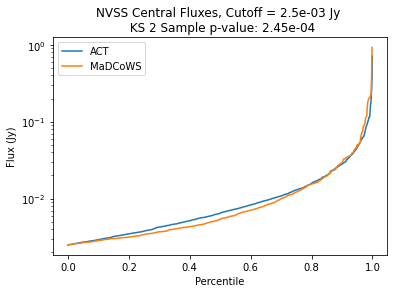

In [72]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))

plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('log')

plt.savefig('./plots/KStests/NVSS.pdf')

# VLASS KS Test

In [79]:
vlass_act_fluxes = np.loadtxt('actCentralFlux.txt')
vlass_mdcw_fluxes = np.loadtxt('madcowsCentralFlux.txt')


cut = 2.5e-3

vlass_act_fluxes = vlass_act_fluxes[vlass_act_fluxes > cut]
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_act_fluxes.sort()
vlass_mdcw_fluxes.sort()

/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/r/rbond/jorlo/actmadcows/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


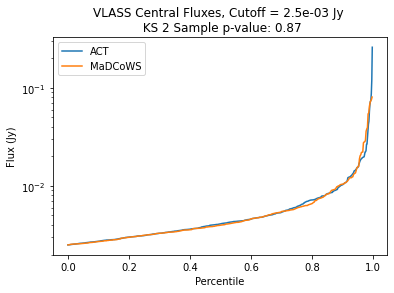

In [80]:
x0 = np.arange(len(vlass_act_fluxes))
x1 = np.arange(len(vlass_mdcw_fluxes))

plt.plot(x0/len(x0), vlass_act_fluxes, label = 'ACT')
plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
p_value = stats.ks_2samp(vlass_act_fluxes, vlass_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2f}'.format(cut, p_value))
plt.yscale('log')

plt.savefig('./plots/KStests/VLASS_{:.2e}.pdf'.format(cut))

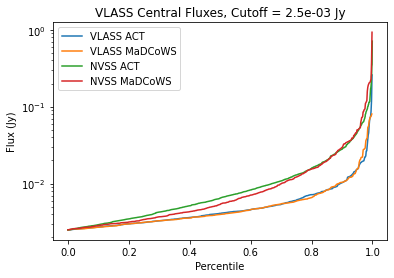

In [75]:
vlass_x0 = np.arange(len(vlass_act_fluxes))
vlass_x1 = np.arange(len(vlass_mdcw_fluxes))

plt.plot(vlass_x0/len(vlass_x0), vlass_act_fluxes, label = 'VLASS ACT')
plt.plot(vlass_x1/len(vlass_x1), vlass_mdcw_fluxes, label = 'VLASS MaDCoWS')

nvss_x0 = np.arange(len(nvss_act_fluxes))
nvss_x1 = np.arange(len(nvss_mdcw_fluxes))

plt.plot(nvss_x0/len(nvss_x0), nvss_act_fluxes, label = 'NVSS ACT')
plt.plot(nvss_x1/len(nvss_x1), nvss_mdcw_fluxes, label = 'NVSS MaDCoWS')



plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('VLASS Central Fluxes, Cutoff = {:.1e} Jy'.format(cut, p_value))
plt.yscale('log')

plt.savefig('./plots/KStests/Both.pdf'.format(p_value))